In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math
import statsmodels as sm
from prophet import Prophet
import pmdarima as pmd
import datetime as dt

In [2]:
data=pd.read_excel("Data File.xlsx",sheet_name='Exhibit 1 -- Data')
data

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,2011-01-14,2011-01-14,...,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,2011-01-14,2011-01-21,...,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,2011-01-15,2011-01-17,...,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
3,4,HN,9.0,12.0,VA,1.0,3.0,B,2011-01-15,2011-01-17,...,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,2011-01-16,2011-01-21,...,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,2388,HS,4.0,4.0,CA,0.0,1.0,A,2011-06-30,2011-06-30,...,Undefined,Undefined,Undefined->Undefined,H,1.0,NaN,0.941176,1.0,NaN,1.0
2388,2389,HD,8.0,8.0,WA,0.0,6.0,A,2011-06-30,2011-07-05,...,Middle,Middle,Middle->Middle,H,1.0,0.027711,0.884615,3.0,L,1.0
2389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.drop([2389,2390,2391],axis=0,inplace=True)
data

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,2011-01-14,2011-01-14,...,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,2011-01-14,2011-01-21,...,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,2011-01-15,2011-01-17,...,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
3,4,HN,9.0,12.0,VA,1.0,3.0,B,2011-01-15,2011-01-17,...,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,1.000000,0.0,NaN,0.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,2011-01-16,2011-01-21,...,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,2385,HC,7.0,8.0,CA,0.0,5.0,A,2011-06-28,2011-07-02,...,Middle,Middle,Middle->Middle,H,0.0,0.018980,0.921053,3.0,L,0.0
2385,2386,HD,8.0,8.0,CA,0.0,5.0,A,2011-06-29,2011-07-03,...,K,Middle,K->Middle,H,1.0,0.034783,0.909091,2.0,S-M,1.0
2386,2387,HD,10.0,12.0,CA,0.0,6.0,A,2011-06-29,2011-07-05,...,Undefined,Undefined,Undefined->Undefined,H,0.0,NaN,0.882353,4.0,NaN,1.0
2387,2388,HS,4.0,4.0,CA,0.0,1.0,A,2011-06-30,2011-06-30,...,Undefined,Undefined,Undefined->Undefined,H,1.0,NaN,0.941176,1.0,NaN,1.0


In [4]:
data.isnull().sum()

ID                                   0
Program.Code                         0
From.Grade                         127
To.Grade                           150
Group.State                          0
Is.Non.Annual.                       0
Days                                 0
Travel.Type                          0
Departure.Date                       0
Return.Date                          0
Deposit.Date                         0
Special.Pay                       1919
Tuition                              0
FRP.Active                           0
FRP.Cancelled                        0
FRP.Take.up.percent.                 0
Early.RPL                          673
Latest.RPL                          19
Cancelled.Pax                        0
Total.Discount.Pax                   0
Initial.System.Date                  8
Poverty.Code                       599
Region                               0
CRM.Segment                          4
School.Type                          0
Parent.Meeting.Flag      

In [5]:
mean_valueA=data['From.Grade'].mean()
data['From.Grade'].fillna(value=mean_valueA,inplace=True)

In [6]:
mean_valueB=data['To.Grade'].mean()
data['To.Grade'].fillna(value=mean_valueB,inplace=True)


In [7]:
mean_valueC=data['CRM.Segment'].mean()
data['CRM.Segment'].fillna(value=mean_valueC,inplace=True)

In [8]:
mean_valueD=data['MDR.High.Grade'].mean()
data['MDR.High.Grade'].fillna(value=mean_valueD,inplace=True)


In [9]:
mean_valueE=data['Total.School.Enrollment'].mean()
data['Total.School.Enrollment'].fillna(value=mean_valueE,inplace=True)

In [10]:
mean_valueF=data['DifferenceTraveltoFirstMeeting'].mean()
data['DifferenceTraveltoFirstMeeting'].fillna(value=mean_valueF,inplace=True)

In [11]:
mean_valueG=data['DifferenceTraveltoLastMeeting'].mean()
data['DifferenceTraveltoLastMeeting'].fillna(value=mean_valueG,inplace=True)

In [12]:
mean_valueH=data['FPP.to.School.enrollment'].mean()
data['FPP.to.School.enrollment'].fillna(value=mean_valueH,inplace=True)

In [13]:
data.isnull().sum()

ID                                   0
Program.Code                         0
From.Grade                           0
To.Grade                             0
Group.State                          0
Is.Non.Annual.                       0
Days                                 0
Travel.Type                          0
Departure.Date                       0
Return.Date                          0
Deposit.Date                         0
Special.Pay                       1919
Tuition                              0
FRP.Active                           0
FRP.Cancelled                        0
FRP.Take.up.percent.                 0
Early.RPL                          673
Latest.RPL                          19
Cancelled.Pax                        0
Total.Discount.Pax                   0
Initial.System.Date                  8
Poverty.Code                       599
Region                               0
CRM.Segment                          0
School.Type                          0
Parent.Meeting.Flag      

In [14]:
data2=data.copy()

In [15]:
data2.drop(['Special.Pay','Early.RPL','Latest.RPL','Departure.Date','Return.Date','Deposit.Date','Initial.System.Date'
           ,'FirstMeeting','LastMeeting','MDR.Low.Grade'],axis=1,inplace=True)
data2
#We have dropped datetime columns. Also SPECIAL PAY has 1939 NaN values, dropped that as well. We dropped the MDR.Low.Grade
#column as that has mixed type of values.

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Tuition,FRP.Active,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,424.0,25.0,...,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,2350.0,9.0,...,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,1181.0,17.0,...,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
3,4,HN,9.0,12.0,VA,1.0,3.0,B,376.0,0.0,...,Undefined,Undefined,Undefined->Undefined,H,0.0,0.066184,1.000000,0.0,NaN,0.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,865.0,40.0,...,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,2385,HC,7.0,8.0,CA,0.0,5.0,A,1892.0,18.0,...,Middle,Middle,Middle->Middle,H,0.0,0.018980,0.921053,3.0,L,0.0
2385,2386,HD,8.0,8.0,CA,0.0,5.0,A,1699.0,16.0,...,K,Middle,K->Middle,H,1.0,0.034783,0.909091,2.0,S-M,1.0
2386,2387,HD,10.0,12.0,CA,0.0,6.0,A,2149.0,0.0,...,Undefined,Undefined,Undefined->Undefined,H,0.0,0.066184,0.882353,4.0,NaN,1.0
2387,2388,HS,4.0,4.0,CA,0.0,1.0,A,449.0,3.0,...,Undefined,Undefined,Undefined->Undefined,H,1.0,0.066184,0.941176,1.0,NaN,1.0


In [16]:
data2.isnull().sum()

ID                                  0
Program.Code                        0
From.Grade                          0
To.Grade                            0
Group.State                         0
Is.Non.Annual.                      0
Days                                0
Travel.Type                         0
Tuition                             0
FRP.Active                          0
FRP.Cancelled                       0
FRP.Take.up.percent.                0
Cancelled.Pax                       0
Total.Discount.Pax                  0
Poverty.Code                      599
Region                              0
CRM.Segment                         0
School.Type                         0
Parent.Meeting.Flag                 0
MDR.High.Grade                      0
Total.School.Enrollment             0
Income.Level                       62
EZ.Pay.Take.Up.Rate                 0
School.Sponsor                      0
SPR.Product.Type                    0
SPR.New.Existing                    0
FPP         

In [17]:
data2['Poverty.Code'].value_counts()

B    961
C    507
A    265
D     36
E     17
0      4
Name: Poverty.Code, dtype: int64

In [18]:
data2['Poverty.Code'].fillna(value='B',inplace=True)



In [19]:
data2.dropna(subset=['Income.Level','SchoolSizeIndicator'],inplace=True)
data2.isnull().sum()

ID                                0
Program.Code                      0
From.Grade                        0
To.Grade                          0
Group.State                       0
Is.Non.Annual.                    0
Days                              0
Travel.Type                       0
Tuition                           0
FRP.Active                        0
FRP.Cancelled                     0
FRP.Take.up.percent.              0
Cancelled.Pax                     0
Total.Discount.Pax                0
Poverty.Code                      0
Region                            0
CRM.Segment                       0
School.Type                       0
Parent.Meeting.Flag               0
MDR.High.Grade                    0
Total.School.Enrollment           0
Income.Level                      0
EZ.Pay.Take.Up.Rate               0
School.Sponsor                    0
SPR.Product.Type                  0
SPR.New.Existing                  0
FPP                               0
Total.Pax                   

In [20]:
data2

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Tuition,FRP.Active,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,424.0,25.0,...,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,2350.0,9.0,...,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,1181.0,17.0,...,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,865.0,40.0,...,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0
5,6,HC,10.0,12.0,LA,0.0,4.0,A,2025.0,9.0,...,High,High,High->High,H,0.0,0.010650,0.909091,1.0,L,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,2382,SC,6.0,8.0,VA,0.0,7.0,A,2650.0,7.0,...,Middle,Middle,Middle->Middle,S,0.0,0.007368,0.875000,1.0,L,0.0
2382,2383,SC,9.0,12.0,CA,0.0,7.0,A,2519.0,6.0,...,High,High,High->High,S,0.0,0.008772,0.909091,1.0,L,1.0
2384,2385,HC,7.0,8.0,CA,0.0,5.0,A,1892.0,18.0,...,Middle,Middle,Middle->Middle,H,0.0,0.018980,0.921053,3.0,L,0.0
2385,2386,HD,8.0,8.0,CA,0.0,5.0,A,1699.0,16.0,...,K,Middle,K->Middle,H,1.0,0.034783,0.909091,2.0,S-M,1.0


In [21]:
print(data2['Is.Non.Annual.'].corr(data2['Retained.in.2012.']))

-0.39764524987285177


In [22]:
data2['SPR.Group.Revenue']=data2['FPP']*data2['Tuition']
data2
#The total revenue column has same data as Tuition column, So we find total revenue by multiplying FPP and Tuition 

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Tuition,FRP.Active,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,424.0,25.0,...,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,4.0,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,2350.0,9.0,...,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,3.0,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,1181.0,17.0,...,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,3.0,L,1.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,865.0,40.0,...,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,8.0,M-L,0.0
5,6,HC,10.0,12.0,LA,0.0,4.0,A,2025.0,9.0,...,High,High,High->High,H,0.0,0.010650,0.909091,1.0,L,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,2382,SC,6.0,8.0,VA,0.0,7.0,A,2650.0,7.0,...,Middle,Middle,Middle->Middle,S,0.0,0.007368,0.875000,1.0,L,0.0
2382,2383,SC,9.0,12.0,CA,0.0,7.0,A,2519.0,6.0,...,High,High,High->High,S,0.0,0.008772,0.909091,1.0,L,1.0
2384,2385,HC,7.0,8.0,CA,0.0,5.0,A,1892.0,18.0,...,Middle,Middle,Middle->Middle,H,0.0,0.018980,0.921053,3.0,L,0.0
2385,2386,HD,8.0,8.0,CA,0.0,5.0,A,1699.0,16.0,...,K,Middle,K->Middle,H,1.0,0.034783,0.909091,2.0,S-M,1.0


In [23]:
data2['SPR.Group.Revenue']

0       25016.0
1       51700.0
2       28344.0
4       70065.0
5       20250.0
         ...   
2381    18550.0
2382    25190.0
2384    66220.0
2385    33980.0
2388    49105.0
Name: SPR.Group.Revenue, Length: 2298, dtype: float64

In [24]:
data2.corr()

,From.Grade,To.Grade,Is.Non.Annual.,Days,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,Total.Discount.Pax,...,Total.Pax,SPR.Group.Revenue,NumberOfMeetingswithParents,DifferenceTraveltoFirstMeeting,DifferenceTraveltoLastMeeting,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,Retained.in.2012.
From.Grade,1.000000,0.779414,-0.107021,0.367490,0.287957,0.089461,0.073407,0.132307,0.056701,0.148138,...,0.042044,0.193196,0.084480,-0.027756,-0.034019,0.185618,-0.061830,-0.127159,0.148138,0.082545
To.Grade,0.779414,1.000000,0.090599,0.407259,0.388813,-0.055401,0.028661,0.157426,0.042008,0.017050,...,-0.120168,0.049625,0.132492,0.035755,0.019734,-0.314874,-0.105106,-0.250633,0.017050,-0.192591
Is.Non.Annual.,-0.107021,0.090599,1.000000,0.020486,0.056021,-0.033835,-0.011581,0.062351,-0.021494,-0.060034,...,-0.071010,-0.014795,0.058580,0.100227,0.063503,-0.357032,0.075935,0.020974,-0.060034,-0.397645
Days,0.367490,0.407259,0.020486,1.000000,0.768870,-0.043236,0.053725,0.065622,0.049004,-0.004463,...,-0.110560,0.314075,0.122340,0.079314,0.049273,-0.127690,-0.109527,-0.182809,-0.004463,-0.052405
Tuition,0.287957,0.388813,0.056021,0.768870,1.000000,-0.235234,-0.012900,0.169339,-0.031608,-0.225230,...,-0.361572,0.193577,0.146107,0.115515,0.094373,-0.191424,-0.277246,-0.305361,-0.225230,-0.120641
FRP.Active,0.089461,-0.055401,-0.033835,-0.043236,-0.235234,1.000000,0.454307,0.259234,0.379204,0.697216,...,0.818093,0.684075,-0.013581,-0.109210,-0.092853,0.206481,0.393675,0.274359,0.697216,0.247792
FRP.Cancelled,0.073407,0.028661,-0.011581,0.053725,-0.012900,0.454307,1.000000,0.171482,0.853245,0.313347,...,0.337699,0.370715,0.092702,0.029396,0.028820,0.055092,0.091254,0.054198,0.313347,0.069357
FRP.Take.up.percent.,0.132307,0.157426,0.062351,0.065622,0.169339,0.259234,0.171482,1.000000,0.047169,-0.109681,...,-0.148901,-0.021545,0.119707,0.056999,0.067363,-0.078087,-0.148195,-0.097232,-0.109681,-0.014388
Cancelled.Pax,0.056701,0.042008,-0.021494,0.049004,-0.031608,0.379204,0.853245,0.047169,1.000000,0.345905,...,0.358461,0.346407,0.080898,0.035907,0.044368,0.019419,0.095976,0.036158,0.345905,0.049270
Total.Discount.Pax,0.148138,0.017050,-0.060034,-0.004463,-0.225230,0.697216,0.313347,-0.109681,0.345905,1.000000,...,0.872913,0.656526,-0.026822,-0.107227,-0.098403,0.182607,0.422004,-0.019616,1.000000,0.209213


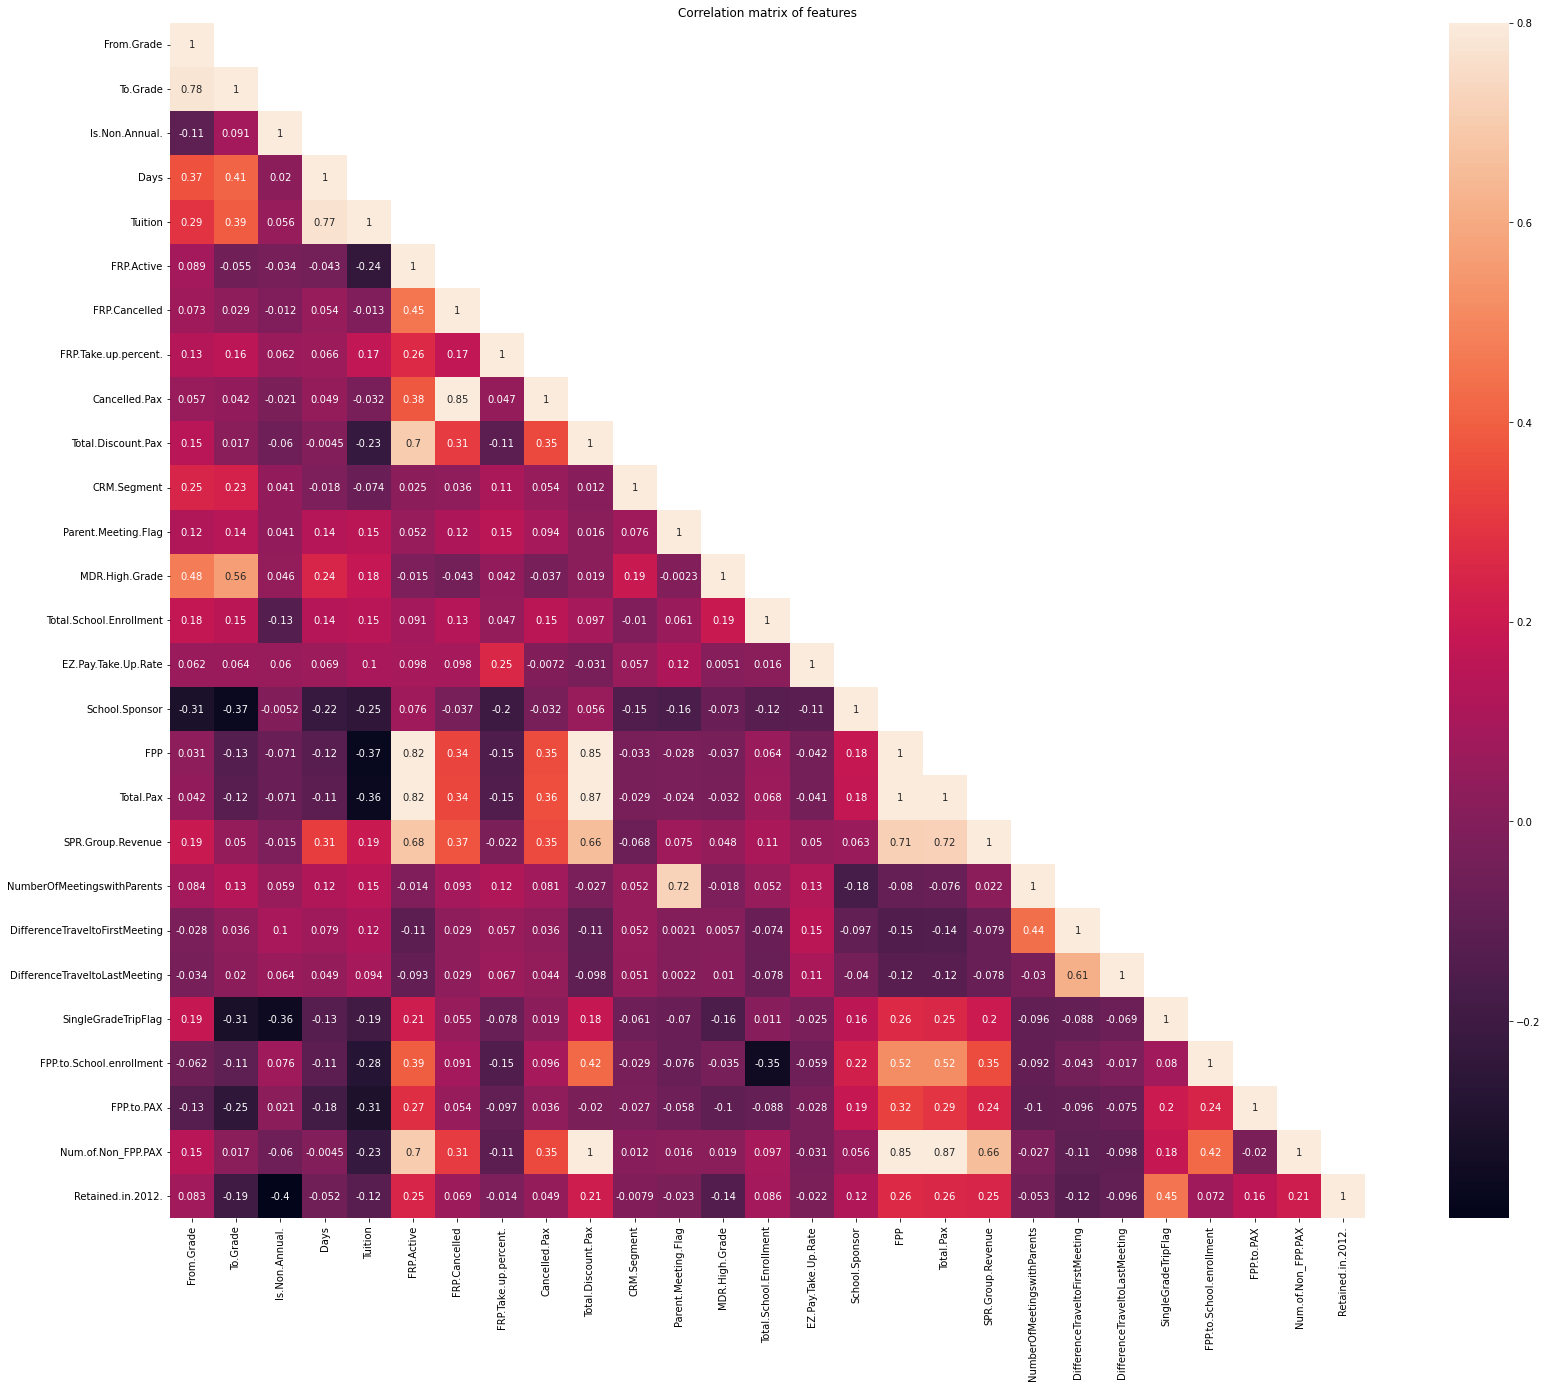

In [25]:
import seaborn as sns
correMtrx=data2.corr()
#Above .corr() outputs the normal correlation matrix
#Below codes are for proper visualization
mask=np.array(correMtrx)
mask[np.tril_indices_from(mask)]=False #To plot a diagonal correlation matrix
fig,ax=plt.subplots(figsize=(30,22))
sns.heatmap(correMtrx,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
plt.title("Correlation matrix of features")
plt.show()

#### From Correlation Matrix, we can see that the desired output "Retained in 2012" has positive correlation with the following features:
#### 1. From Grade 2. FRP.Active 3. FRP.Cancelled 4. Cancelled.Pax 5. Total.Discount.Pax 6.Total.School.Enrolment 7.School.Sponsor
#### 8. FPP 9. Total.Pax 10. SingleGradeTripFlag 11. FPP.toSchoolEnrolment 12.FPPtoPAX 13. NumofNon_FPP.Pax
#### Number of Non FPP Pax and Total Discounter Pax expresses the same thing, number of people who are a part of the trip WITHOUT Paying.

In [26]:
data2.drop('Num.of.Non_FPP.PAX',axis=1,inplace=True)
data2

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Tuition,FRP.Active,...,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,424.0,25.0,...,January,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,2350.0,9.0,...,January,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,1181.0,17.0,...,January,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,L,1.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,865.0,40.0,...,January,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,M-L,0.0
5,6,HC,10.0,12.0,LA,0.0,4.0,A,2025.0,9.0,...,January,High,High,High->High,H,0.0,0.010650,0.909091,L,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,2382,SC,6.0,8.0,VA,0.0,7.0,A,2650.0,7.0,...,June,Middle,Middle,Middle->Middle,S,0.0,0.007368,0.875000,L,0.0
2382,2383,SC,9.0,12.0,CA,0.0,7.0,A,2519.0,6.0,...,June,High,High,High->High,S,0.0,0.008772,0.909091,L,1.0
2384,2385,HC,7.0,8.0,CA,0.0,5.0,A,1892.0,18.0,...,June,Middle,Middle,Middle->Middle,H,0.0,0.018980,0.921053,L,0.0
2385,2386,HD,8.0,8.0,CA,0.0,5.0,A,1699.0,16.0,...,June,K,Middle,K->Middle,H,1.0,0.034783,0.909091,S-M,1.0


In [27]:
data_hist=data2[['From.Grade','To.Grade','Is.Non.Annual.','Days','Tuition','FRP.Active','FRP.Cancelled','FRP.Take.up.percent.',
                'Cancelled.Pax','Total.Discount.Pax','CRM.Segment','Parent.Meeting.Flag','MDR.High.Grade',
                'Total.School.Enrollment','EZ.Pay.Take.Up.Rate','School.Sponsor','FPP','Total.Pax','SPR.Group.Revenue',
                'NumberOfMeetingswithParents','DifferenceTraveltoFirstMeeting','DifferenceTraveltoLastMeeting',
                'SingleGradeTripFlag','FPP.to.School.enrollment','FPP.to.PAX']]

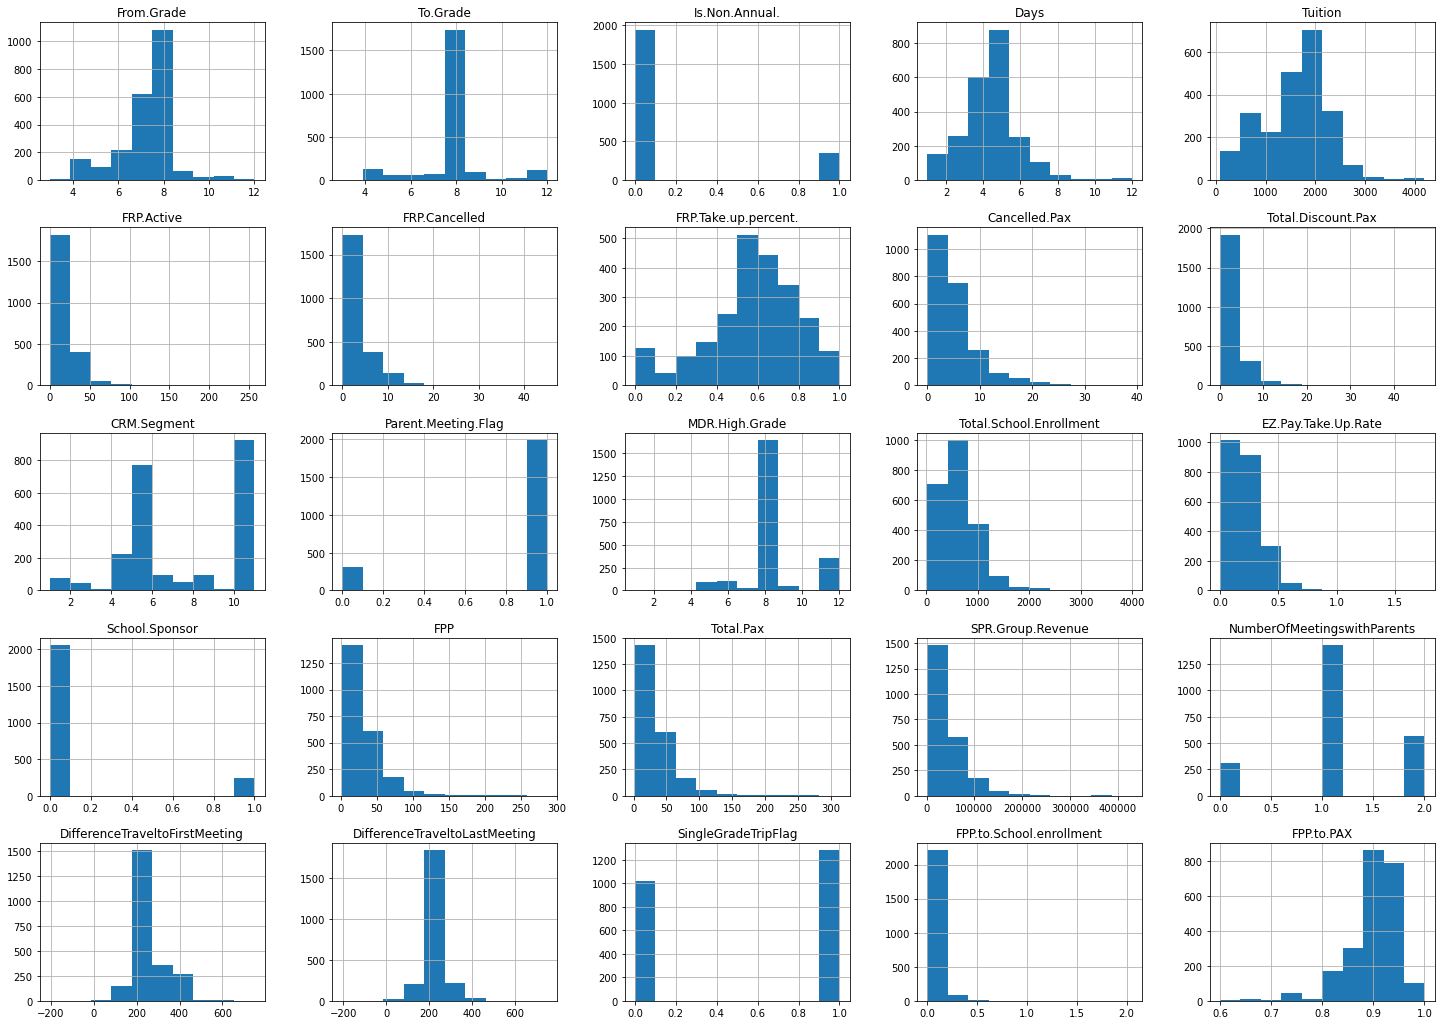

In [28]:
data_hist.hist(figsize=(25,18));

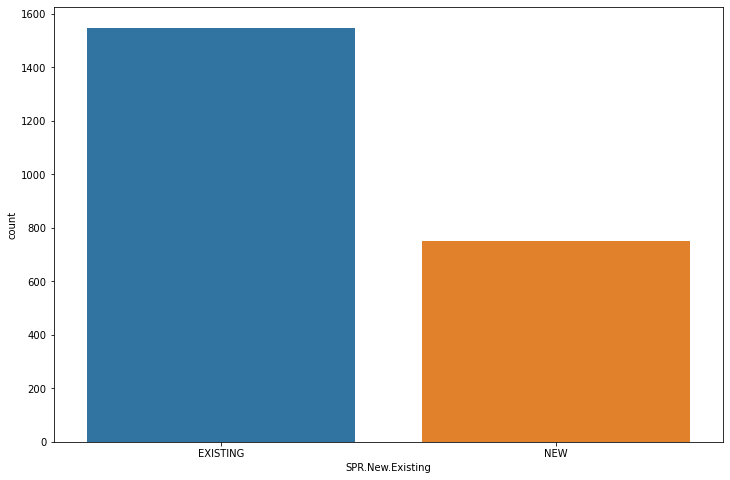

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(data=data2, x='SPR.New.Existing');

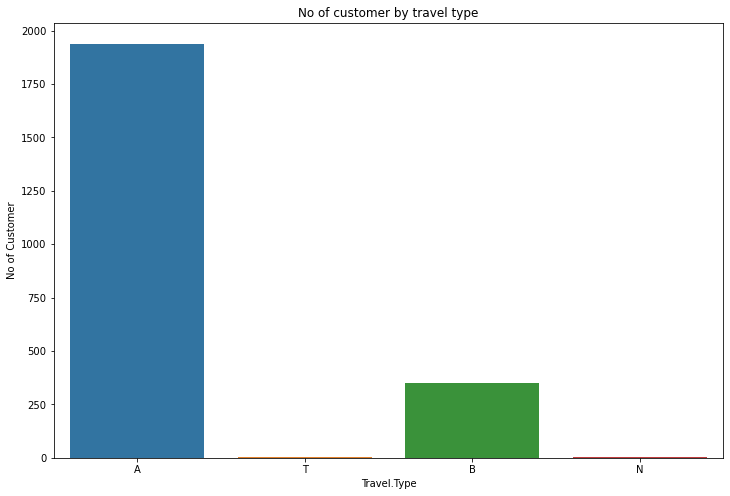

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(data=data2, x='Travel.Type')
plt.ylabel('No of Customer')
plt.title('No of customer by travel type');

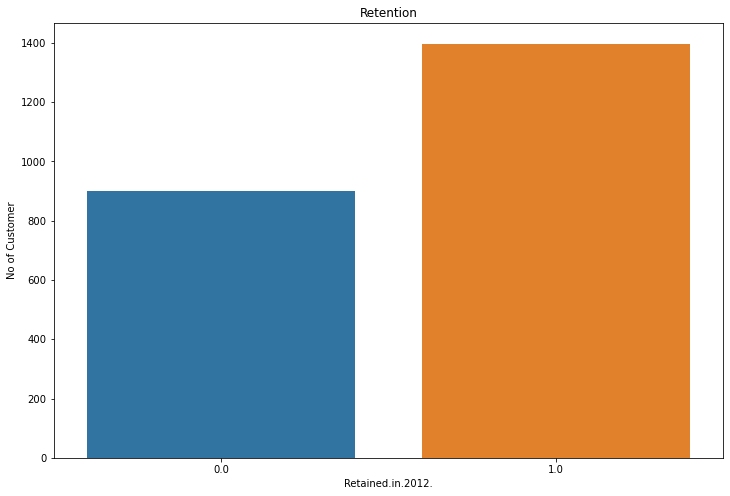

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(data=data2, x='Retained.in.2012.')
plt.ylabel('No of Customer')
plt.title('Retention');

In [32]:
data2['Retained.in.2012.'].value_counts()

1.0    1397
0.0     901
Name: Retained.in.2012., dtype: int64

#### Out of 2298 Customers, 1397 was retained in 2012, so approx 60.79% was retained.

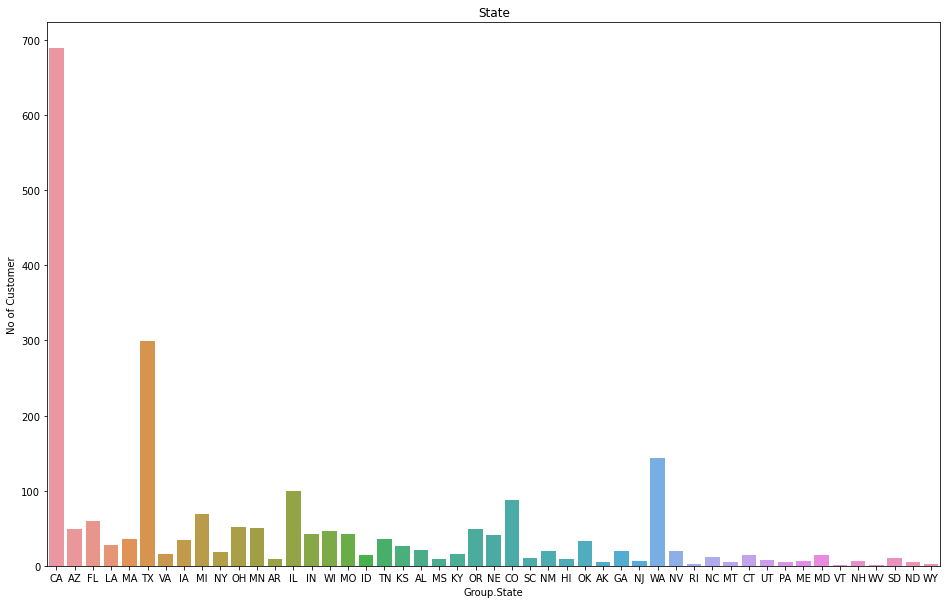

In [33]:
plt.figure(figsize=(16,10))
sns.countplot(data=data2, x='Group.State')
plt.ylabel('No of Customer')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('State');

#### Most of the customers or schools are coming from California and Texas.

In [34]:
schooltype=data2.groupby('School.Type')['Retained.in.2012.'].sum()
print(schooltype)

School.Type
CHD                       132.0
Catholic                  106.0
PUBLIC                   1048.0
Private non-Christian     111.0
Name: Retained.in.2012., dtype: float64


In [35]:
data2['School.Type'].value_counts()

PUBLIC                   1777
CHD                       207
Catholic                  163
Private non-Christian     151
Name: School.Type, dtype: int64

#### The above two lines mean that out of 1777 PUBLIC schools, 1048 Schools were retained in 2012, roughly 59%
#### Out of 207 CHD, 132 or 63.7% were retained
#### Out of 163 Catholic, 106 or 65% were retained
#### Out of 151 Non_christian private, 111 or 73.5% were retained.
#### So, PRIVATE NON-CHRISTIAN SHOWS MORE LIKELY TO BE RETAINED.

In [36]:
producttype=data2.groupby('SPR.Product.Type')['Retained.in.2012.'].sum()
print(producttype)

SPR.Product.Type
CA History        117.0
Costa Rica         12.0
East Coast       1202.0
IL History          3.0
International       1.0
Science            62.0
Name: Retained.in.2012., dtype: float64


In [37]:
data2['SPR.Product.Type'].value_counts()

East Coast       1931
CA History        165
Science           137
Costa Rica         46
International      15
IL History          4
Name: SPR.Product.Type, dtype: int64

### East Coast and CA History type tour goers are more likely to be retained

In [38]:
groupgradetype=data2.groupby('GroupGradeType')['Retained.in.2012.'].sum()
print(groupgradetype)

GroupGradeType
Elementary->Elementary      5.0
Elementary->High            2.0
Elementary->Middle         76.0
High->High                 22.0
K->Elementary              46.0
K->High                    17.0
K->Middle                 171.0
Middle->High               75.0
Middle->Middle            739.0
PK->Elementary             18.0
PK->High                   64.0
PK->Middle                159.0
Undefined->Undefined        3.0
Name: Retained.in.2012., dtype: float64


In [39]:
data2['GroupGradeType'].value_counts()

Middle->Middle            1094
K->Middle                  297
PK->Middle                 262
Middle->High               145
Elementary->Middle         120
High->High                 106
PK->High                   103
K->Elementary               70
K->High                     52
PK->Elementary              31
Elementary->High             8
Elementary->Elementary       6
Undefined->Undefined         4
Name: GroupGradeType, dtype: int64

In [40]:
data2.dtypes

ID                                 object
Program.Code                       object
From.Grade                        float64
To.Grade                          float64
Group.State                        object
Is.Non.Annual.                    float64
Days                              float64
Travel.Type                        object
Tuition                           float64
FRP.Active                        float64
FRP.Cancelled                     float64
FRP.Take.up.percent.              float64
Cancelled.Pax                     float64
Total.Discount.Pax                float64
Poverty.Code                       object
Region                             object
CRM.Segment                       float64
School.Type                        object
Parent.Meeting.Flag               float64
MDR.High.Grade                    float64
Total.School.Enrollment           float64
Income.Level                       object
EZ.Pay.Take.Up.Rate               float64
School.Sponsor                    

In [41]:
categorical_columns = data2.select_dtypes(exclude = 'number').drop('ID', axis = 1).columns
categorical_columns

Index(['Program.Code', 'Group.State', 'Travel.Type', 'Poverty.Code', 'Region',
       'School.Type', 'Income.Level', 'SPR.Product.Type', 'SPR.New.Existing',
       'SchoolGradeTypeLow', 'SchoolGradeTypeHigh', 'SchoolGradeType',
       'DepartureMonth', 'GroupGradeTypeLow', 'GroupGradeTypeHigh',
       'GroupGradeType', 'MajorProgramCode', 'SchoolSizeIndicator'],
      dtype='object')

In [42]:
data3=data2.copy()

In [43]:
data3

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Tuition,FRP.Active,...,DepartureMonth,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0.0,1.0,A,424.0,25.0,...,January,K,Elementary,K->Elementary,H,1.0,0.063646,0.936508,L,1.0
1,2,HC,8.0,8.0,AZ,0.0,7.0,A,2350.0,9.0,...,January,Middle,Middle,Middle->Middle,H,1.0,0.025882,0.880000,L,1.0
2,3,HD,8.0,8.0,FL,0.0,3.0,A,1181.0,17.0,...,January,Middle,Middle,Middle->Middle,H,1.0,0.025131,0.888889,L,1.0
4,5,HD,6.0,8.0,FL,0.0,6.0,T,865.0,40.0,...,January,Middle,Middle,Middle->Middle,H,0.0,0.112500,0.910112,M-L,0.0
5,6,HC,10.0,12.0,LA,0.0,4.0,A,2025.0,9.0,...,January,High,High,High->High,H,0.0,0.010650,0.909091,L,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,2382,SC,6.0,8.0,VA,0.0,7.0,A,2650.0,7.0,...,June,Middle,Middle,Middle->Middle,S,0.0,0.007368,0.875000,L,0.0
2382,2383,SC,9.0,12.0,CA,0.0,7.0,A,2519.0,6.0,...,June,High,High,High->High,S,0.0,0.008772,0.909091,L,1.0
2384,2385,HC,7.0,8.0,CA,0.0,5.0,A,1892.0,18.0,...,June,Middle,Middle,Middle->Middle,H,0.0,0.018980,0.921053,L,0.0
2385,2386,HD,8.0,8.0,CA,0.0,5.0,A,1699.0,16.0,...,June,K,Middle,K->Middle,H,1.0,0.034783,0.909091,S-M,1.0


In [44]:
data3['Retained.in.2012. '] = data3['Retained.in.2012.'].astype('object')

In [45]:
data3.dtypes

ID                                 object
Program.Code                       object
From.Grade                        float64
To.Grade                          float64
Group.State                        object
Is.Non.Annual.                    float64
Days                              float64
Travel.Type                        object
Tuition                           float64
FRP.Active                        float64
FRP.Cancelled                     float64
FRP.Take.up.percent.              float64
Cancelled.Pax                     float64
Total.Discount.Pax                float64
Poverty.Code                       object
Region                             object
CRM.Segment                       float64
School.Type                        object
Parent.Meeting.Flag               float64
MDR.High.Grade                    float64
Total.School.Enrollment           float64
Income.Level                       object
EZ.Pay.Take.Up.Rate               float64
School.Sponsor                    

In [46]:
from scipy.stats import chi2_contingency
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(data3['Retained.in.2012.'], data3[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                 Column              Hypothesis
0          Program.Code  Reject Null Hypothesis
1           Group.State  Reject Null Hypothesis
2           Travel.Type  Reject Null Hypothesis
3          Poverty.Code  Reject Null Hypothesis
4                Region  Reject Null Hypothesis
5           School.Type  Reject Null Hypothesis
6          Income.Level  Reject Null Hypothesis
7      SPR.Product.Type  Reject Null Hypothesis
8      SPR.New.Existing  Reject Null Hypothesis
9    SchoolGradeTypeLow  Reject Null Hypothesis
10  SchoolGradeTypeHigh  Reject Null Hypothesis
11      SchoolGradeType  Reject Null Hypothesis
12       DepartureMonth  Reject Null Hypothesis
13    GroupGradeTypeLow  Reject Null Hypothesis
14   GroupGradeTypeHigh  Reject Null Hypothesis
15       GroupGradeType  Reject Null Hypothesis
16     MajorProgramCode  Reject Null Hypothesis
17  SchoolSizeIndicator  Reject Null Hypothesis


In [47]:
data2.dtypes

ID                                 object
Program.Code                       object
From.Grade                        float64
To.Grade                          float64
Group.State                        object
Is.Non.Annual.                    float64
Days                              float64
Travel.Type                        object
Tuition                           float64
FRP.Active                        float64
FRP.Cancelled                     float64
FRP.Take.up.percent.              float64
Cancelled.Pax                     float64
Total.Discount.Pax                float64
Poverty.Code                       object
Region                             object
CRM.Segment                       float64
School.Type                        object
Parent.Meeting.Flag               float64
MDR.High.Grade                    float64
Total.School.Enrollment           float64
Income.Level                       object
EZ.Pay.Take.Up.Rate               float64
School.Sponsor                    

In [48]:
from sklearn import preprocessing

In [49]:
data6=data2.copy()

In [50]:
num_columns=data2.select_dtypes(exclude = 'object').drop('Retained.in.2012.',axis=1).columns
num_columns

Index(['From.Grade', 'To.Grade', 'Is.Non.Annual.', 'Days', 'Tuition',
       'FRP.Active', 'FRP.Cancelled', 'FRP.Take.up.percent.', 'Cancelled.Pax',
       'Total.Discount.Pax', 'CRM.Segment', 'Parent.Meeting.Flag',
       'MDR.High.Grade', 'Total.School.Enrollment', 'EZ.Pay.Take.Up.Rate',
       'School.Sponsor', 'FPP', 'Total.Pax', 'SPR.Group.Revenue',
       'NumberOfMeetingswithParents', 'DifferenceTraveltoFirstMeeting',
       'DifferenceTraveltoLastMeeting', 'SingleGradeTripFlag',
       'FPP.to.School.enrollment', 'FPP.to.PAX'],
      dtype='object')

### Creating a Random Forest for classification and building the prediction model

In [51]:
ordinal_encoding_features=['SchoolGradeTypeLow','SchoolGradeTypeHigh','GroupGradeTypeLow','GroupGradeTypeHigh',
                          'SchoolSizeIndicator']
one_hot_encoding_features=['Group.State','Travel.Type','School.Type','SPR.Product.Type','SPR.New.Existing','SchoolGradeType','DepartureMonth',
                          'GroupGradeType']

#### Because of Poverty.Code and Income.Level being column mixed with int and str data types, we are not considering them for encoding


In [52]:
y=data6['Retained.in.2012.']
data6.drop('Retained.in.2012.',axis=1,inplace=True)

In [53]:
## create the encoder object 
ordinal_encoder = sklearn.preprocessing.OrdinalEncoder()
## fit the encoder object and transform the data 
data6[ordinal_encoding_features] = ordinal_encoder.fit_transform(data6[ordinal_encoding_features])

In [54]:
## create the encoder object 
one_hot_encoder = sklearn.preprocessing.OneHotEncoder()
## fit the encoder object and transform the data, save as encoded_columns
encoded_columns = one_hot_encoder.fit_transform(data6[one_hot_encoding_features]).toarray()
## create names for the newly encoded features (this will use our original names + underscore + the binary category)
feature_names = one_hot_encoder.get_feature_names(one_hot_encoding_features)
## print out the feature_names so you understand what they represent 

print(feature_names)
## convert encoded_columns to a dataframe 
encoded_columns_df = pd.DataFrame(encoded_columns, columns = feature_names)
## drop the old columns and append the new columns
partial_data = data6.drop(one_hot_encoding_features, axis = 1)
data_encoded_fully2= pd.concat([partial_data.reset_index(drop=True), encoded_columns_df.reset_index(drop=True)], axis = 1)

['Group.State_AK' 'Group.State_AL' 'Group.State_AR' 'Group.State_AZ'
 'Group.State_CA' 'Group.State_CO' 'Group.State_CT' 'Group.State_FL'
 'Group.State_GA' 'Group.State_HI' 'Group.State_IA' 'Group.State_ID'
 'Group.State_IL' 'Group.State_IN' 'Group.State_KS' 'Group.State_KY'
 'Group.State_LA' 'Group.State_MA' 'Group.State_MD' 'Group.State_ME'
 'Group.State_MI' 'Group.State_MN' 'Group.State_MO' 'Group.State_MS'
 'Group.State_MT' 'Group.State_NC' 'Group.State_ND' 'Group.State_NE'
 'Group.State_NH' 'Group.State_NJ' 'Group.State_NM' 'Group.State_NV'
 'Group.State_NY' 'Group.State_OH' 'Group.State_OK' 'Group.State_OR'
 'Group.State_PA' 'Group.State_RI' 'Group.State_SC' 'Group.State_SD'
 'Group.State_TN' 'Group.State_TX' 'Group.State_UT' 'Group.State_VA'
 'Group.State_VT' 'Group.State_WA' 'Group.State_WI' 'Group.State_WV'
 'Group.State_WY' 'Travel.Type_A' 'Travel.Type_B' 'Travel.Type_N'
 'Travel.Type_T' 'School.Type_CHD' 'School.Type_Catholic'
 'School.Type_PUBLIC' 'School.Type_Private non-C

C:\Users\tanmo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [55]:
print(data6.shape)
print(data_encoded_fully2.shape)

(2298, 44)
(2298, 129)


In [56]:
data6[one_hot_encoding_features]

,Group.State,Travel.Type,School.Type,SPR.Product.Type,SPR.New.Existing,SchoolGradeType,DepartureMonth,GroupGradeType
0,CA,A,PUBLIC,CA History,EXISTING,Elementary->Elementary,January,K->Elementary
1,AZ,A,PUBLIC,East Coast,EXISTING,Middle->Middle,January,Middle->Middle
2,FL,A,PUBLIC,East Coast,EXISTING,Middle->Middle,January,Middle->Middle
4,FL,T,PUBLIC,East Coast,EXISTING,Middle->Middle,January,Middle->Middle
5,LA,A,PUBLIC,East Coast,NEW,High->High,January,High->High
...,...,...,...,...,...,...,...,...
2381,VA,A,PUBLIC,Costa Rica,EXISTING,Middle->Middle,June,Middle->Middle
2382,CA,A,PUBLIC,Costa Rica,NEW,High->High,June,High->High
2384,CA,A,PUBLIC,East Coast,EXISTING,Middle->Middle,June,Middle->Middle
2385,CA,A,PUBLIC,East Coast,EXISTING,Middle->Middle,June,K->Middle


In [57]:
partial_data

,ID,Program.Code,From.Grade,To.Grade,Is.Non.Annual.,Days,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,...,DifferenceTraveltoLastMeeting,SchoolGradeTypeLow,SchoolGradeTypeHigh,GroupGradeTypeLow,GroupGradeTypeHigh,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,SchoolSizeIndicator
0,1,HS,4.0,4.0,0.0,1.0,424.0,25.0,3.0,0.424,...,155.00000,0.0,0.0,2.0,0.0,H,1.0,0.063646,0.936508,0.0
1,2,HC,8.0,8.0,0.0,7.0,2350.0,9.0,9.0,0.409,...,140.00000,2.0,2.0,3.0,2.0,H,1.0,0.025882,0.880000,0.0
2,3,HD,8.0,8.0,0.0,3.0,1181.0,17.0,6.0,0.708,...,124.00000,2.0,2.0,3.0,2.0,H,1.0,0.025131,0.888889,0.0
4,5,HD,6.0,8.0,0.0,6.0,865.0,40.0,8.0,0.494,...,145.00000,2.0,2.0,3.0,2.0,H,0.0,0.112500,0.910112,1.0
5,6,HC,10.0,12.0,0.0,4.0,2025.0,9.0,4.0,0.900,...,91.00000,1.0,1.0,1.0,1.0,H,0.0,0.010650,0.909091,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,2382,SC,6.0,8.0,0.0,7.0,2650.0,7.0,0.0,1.000,...,266.00000,2.0,2.0,3.0,2.0,S,0.0,0.007368,0.875000,0.0
2382,2383,SC,9.0,12.0,0.0,7.0,2519.0,6.0,0.0,0.600,...,229.00000,1.0,1.0,1.0,1.0,S,0.0,0.008772,0.909091,0.0
2384,2385,HC,7.0,8.0,0.0,5.0,1892.0,18.0,4.0,0.514,...,228.97807,2.0,2.0,3.0,2.0,H,0.0,0.018980,0.921053,0.0
2385,2386,HD,8.0,8.0,0.0,5.0,1699.0,16.0,4.0,0.800,...,265.00000,2.0,2.0,2.0,2.0,H,1.0,0.034783,0.909091,3.0


In [58]:
encoded_columns_df

,Group.State_AK,Group.State_AL,Group.State_AR,Group.State_AZ,Group.State_CA,Group.State_CO,Group.State_CT,Group.State_FL,Group.State_GA,Group.State_HI,...,GroupGradeType_High->High,GroupGradeType_K->Elementary,GroupGradeType_K->High,GroupGradeType_K->Middle,GroupGradeType_Middle->High,GroupGradeType_Middle->Middle,GroupGradeType_PK->Elementary,GroupGradeType_PK->High,GroupGradeType_PK->Middle,GroupGradeType_Undefined->Undefined
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2295,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2296,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
data_encoded_fully2

,ID,Program.Code,From.Grade,To.Grade,Is.Non.Annual.,Days,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,...,GroupGradeType_High->High,GroupGradeType_K->Elementary,GroupGradeType_K->High,GroupGradeType_K->Middle,GroupGradeType_Middle->High,GroupGradeType_Middle->Middle,GroupGradeType_PK->Elementary,GroupGradeType_PK->High,GroupGradeType_PK->Middle,GroupGradeType_Undefined->Undefined
0,1,HS,4.0,4.0,0.0,1.0,424.0,25.0,3.0,0.424,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,HC,8.0,8.0,0.0,7.0,2350.0,9.0,9.0,0.409,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,HD,8.0,8.0,0.0,3.0,1181.0,17.0,6.0,0.708,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5,HD,6.0,8.0,0.0,6.0,865.0,40.0,8.0,0.494,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6,HC,10.0,12.0,0.0,4.0,2025.0,9.0,4.0,0.900,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,2382,SC,6.0,8.0,0.0,7.0,2650.0,7.0,0.0,1.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2294,2383,SC,9.0,12.0,0.0,7.0,2519.0,6.0,0.0,0.600,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2295,2385,HC,7.0,8.0,0.0,5.0,1892.0,18.0,4.0,0.514,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2296,2386,HD,8.0,8.0,0.0,5.0,1699.0,16.0,4.0,0.800,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
data_encoded_fully2.drop(['ID','Program.Code','MajorProgramCode','Poverty.Code','Region','Income.Level'],axis=1,inplace=True)
data_encoded_fully2

,From.Grade,To.Grade,Is.Non.Annual.,Days,Tuition,FRP.Active,FRP.Cancelled,FRP.Take.up.percent.,Cancelled.Pax,Total.Discount.Pax,...,GroupGradeType_High->High,GroupGradeType_K->Elementary,GroupGradeType_K->High,GroupGradeType_K->Middle,GroupGradeType_Middle->High,GroupGradeType_Middle->Middle,GroupGradeType_PK->Elementary,GroupGradeType_PK->High,GroupGradeType_PK->Middle,GroupGradeType_Undefined->Undefined
0,4.0,4.0,0.0,1.0,424.0,25.0,3.0,0.424,3.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.0,8.0,0.0,7.0,2350.0,9.0,9.0,0.409,11.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,8.0,8.0,0.0,3.0,1181.0,17.0,6.0,0.708,6.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,6.0,8.0,0.0,6.0,865.0,40.0,8.0,0.494,9.0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,10.0,12.0,0.0,4.0,2025.0,9.0,4.0,0.900,3.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,6.0,8.0,0.0,7.0,2650.0,7.0,0.0,1.000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2294,9.0,12.0,0.0,7.0,2519.0,6.0,0.0,0.600,4.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2295,7.0,8.0,0.0,5.0,1892.0,18.0,4.0,0.514,7.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2296,8.0,8.0,0.0,5.0,1699.0,16.0,4.0,0.800,4.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
from sklearn.model_selection import train_test_split
## Fill in the below line of code: 
X_train, X_test, y_train, y_test = train_test_split(data_encoded_fully2, y, test_size = 0.2, train_size = 0.8)

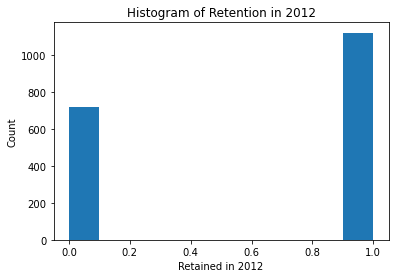

In [62]:
## Your code here: 
plt.hist(y_train)
plt.xlabel('Retained in 2012')
plt.ylabel('Count')
plt.title('Histogram of Retention in 2012')
plt.show()

In [63]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(n_estimators=200,random_state=0)
clf_rf.fit(X_train,y_train)
predictions=clf_rf.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))


              precision    recall  f1-score   support

         0.0       0.78      0.67      0.72       183
         1.0       0.80      0.87      0.83       277

    accuracy                           0.79       460
   macro avg       0.79      0.77      0.78       460
weighted avg       0.79      0.79      0.79       460

0.7913043478260869


#### The model is predicting upto 79.13% accuracy, which can be regarded as a good model. 

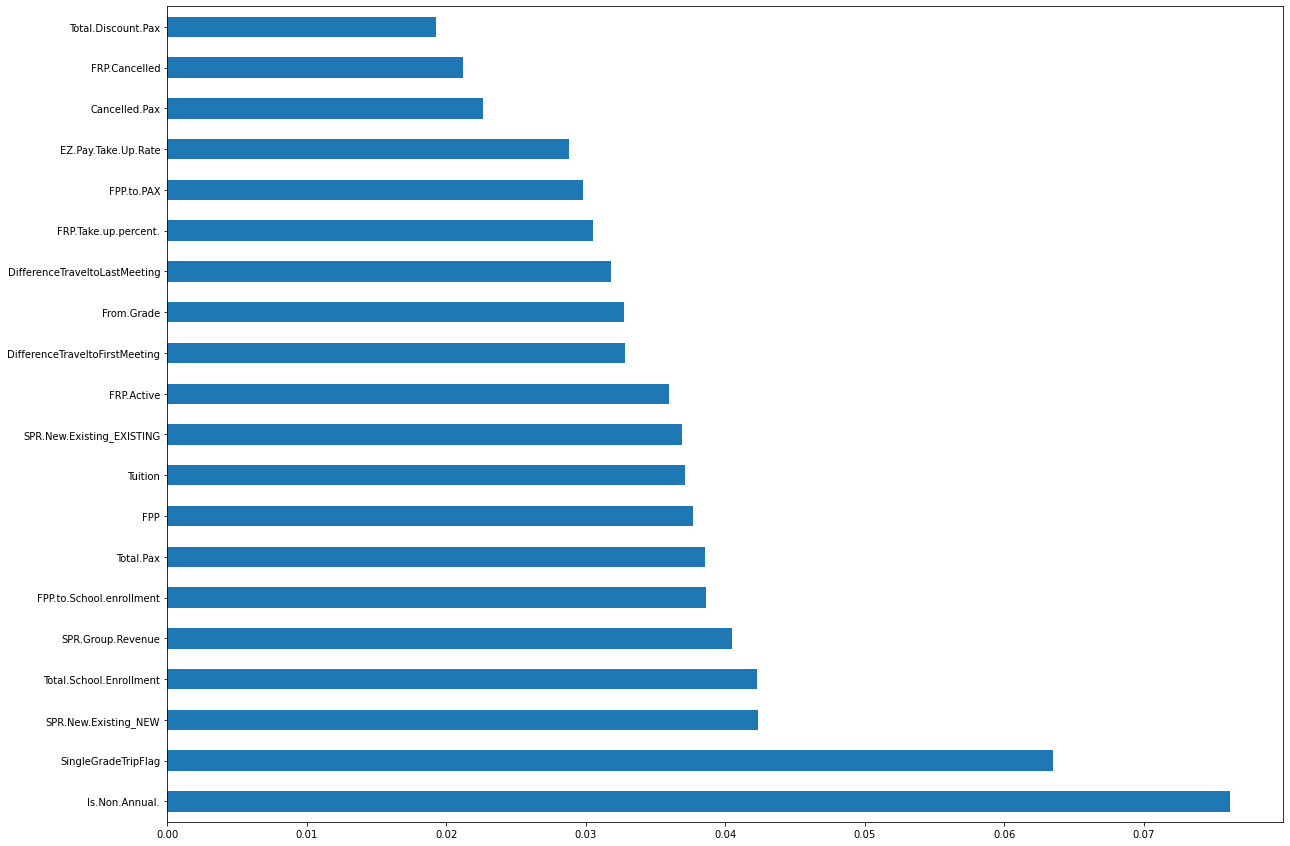

In [65]:
plt.figure(figsize=(20,15))
feat_importances = pd.Series(clf_rf.feature_importances_, index=data_encoded_fully2.columns)
feat_importances.nlargest(20).plot(kind='barh');

#### We can see which features are more important for predicting which customers will be retained, and these are:
#### 1. Whether the group going to the trip is from Same grade or not; group with same grade are most likely to be retained
#### 2. Whether the group is non annual or not. 
#### 3. Size of the school. The larger the size the higher probability of retention
#### 4. How much revenue the group is generating for the company
#### 5. Whether the group is an existing or a new client. The impact on retention of a NEW group looks higher than an existing group

### Lets make a confusion Matrix to validate our accuracy!

<Figure size 2016x1440 with 0 Axes>

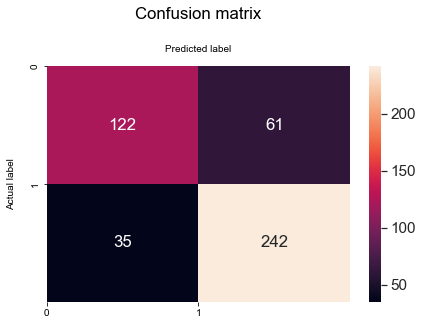

In [66]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n');

#### TP= 242, TN=122, FP=61, FN=35. Total= 460
#### Accuracy: ((242+122)/460)*100= 79.13%
#### So our accuracy is correct!

In [67]:
clf_rf_2=RandomForestClassifier(n_estimators=150,random_state=0,criterion='gini')
clf_rf_2.fit(X_train,y_train)
predictions_2=clf_rf.predict(X_test)

In [68]:
print(classification_report(y_test,predictions_2 )) 
print(accuracy_score(y_test, predictions_2 ))

              precision    recall  f1-score   support

         0.0       0.78      0.67      0.72       183
         1.0       0.80      0.87      0.83       277

    accuracy                           0.79       460
   macro avg       0.79      0.77      0.78       460
weighted avg       0.79      0.79      0.79       460

0.7913043478260869


#### IF we change the number of estimators or the number of Decision Trees in the RF to 150, and add the criterion to "GINI",
#### our accuracy remains the same.

In [69]:
clf_rf_3=RandomForestClassifier(n_estimators=300,random_state=0)
clf_rf_3.fit(X_train,y_train)
predictions_3=clf_rf.predict(X_test)

In [70]:
print(classification_report(y_test,predictions_3 )) 
print(accuracy_score(y_test, predictions_3 ))

              precision    recall  f1-score   support

         0.0       0.78      0.67      0.72       183
         1.0       0.80      0.87      0.83       277

    accuracy                           0.79       460
   macro avg       0.79      0.77      0.78       460
weighted avg       0.79      0.79      0.79       460

0.7913043478260869


### THIS MEANS CHANGING THE HYPERPARAMETER DOES NOT IMPACT OUR ACCURACY!

### DECISION TREE

In [71]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [72]:
clf_dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [73]:
pred_dt=clf_dt.predict(X_test)


In [74]:
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score

In [75]:
print(accuracy_score(y_test,pred_dt))
print(precision_score(y_test,pred_dt))

0.7043478260869566
0.7563636363636363


#### Decision Tree Model predicts with 70.43% accuracy, which is not a very impressive number.

### NAIVE BAYES

In [76]:
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB

In [77]:
clf_nb=GaussianNB()
clf_nb.fit(X_train,y_train)

GaussianNB()

In [78]:
pred_nb=clf_nb.predict(X_test)

In [79]:
print(accuracy_score(y_test,pred_nb))
print(precision_score(y_test,pred_nb))

0.5760869565217391
0.759493670886076


#### Naive Bayes accuracy is even lower, 57.61%.
#### So out of three models in this file; Decision Tree, Random Forest, and Naive Bayes, Random Forest is our BEST prediction model.